In [ ]:
#Game room
# define rooms and items

couch = {
    "name": "couch",
    "type": "furniture",
}

door_a = {
    "name": "door a",
    "type": "door",
    #"img": "/open door.jpeg"
}

key_a = {
    "name": "key for door a",
    "type": "key",
    "target": door_a,
    "img": "/finding the keys .webp"
}

piano = {
    "name": "piano",
    "type": "furniture",
}


game_room= {
    "name": "game room",
    "type": "room",
    "img": "/First Image Waking up.webp"
}


#Bedroom 1
# define rooms and items

door_b = {
    "name": "door b",
    "type": "door",
}

key_b = {
    "name": "key for door b",
    "type": "key",
    "target": door_b,
    "img": "/finding the keys .webp"
}

queen_bed = {
    "name": "queen bed",
    "type": "furniture",
}


door_c= {
    "name": "door c",
    "type": "door",
}

bedroom1 = {
    "name": "bedroom1",
    "type": "room",
    "img": "/bedroom1.webp"
}

#Living room
# define rooms and items

dining_table = {
    "name": "dining table",
    "type": "furniture",
}

door_d = {
    "name": "door d",
    "type": "door",
}


living_room = {
    "name": "living room",
    "type": "room",
    "img": "/living_room.webp"
}

outside = {
  "name": "outside",
  "type": "room",
  "img": "/First Image Waking up.webp"
}


#Bedroom 2
# define rooms and items

double_bed = {
    "name": "double bed",
    "type": "furniture",
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}


key_c = {
    "name": "key for door c",
    "type": "key",
    "target": door_c,
    "img": "/finding the keys .webp"
}

key_d = {
    "name": "key for door d",
    "type": "key",
    "target": door_d,
    "img": "/finding the keys .webp"
}

bedroom2 = {
    "name": "bedroom2",
    "type": "room",
    "img": "/bedroom2.webp"
}



all_rooms = [game_room, bedroom1, bedroom2, living_room, outside]

all_doors = [door_a, door_b, door_c, door_d]

object_relations = {
    "game room": [couch, piano, door_a],
    "piano": [key_a],
    "door a": [game_room,bedroom1 ],

    "bedroom1" : [door_a, door_b, queen_bed, door_c],
    "queen bed" : [key_b],
    "door b" : [bedroom1, bedroom2],
    "door c" : [bedroom1, living_room],

    "bedroom2": [double_bed, dresser, door_b],
    "double bed": [key_c],
    "dresser": [key_d],

    "living room" : [dining_table, door_c, door_d],
    "door d": [living_room, outside],
}

#### initilize game state


INIT_GAME_STATE = {
    "current_room": game_room,
    "keys_collected": [],
    "target_room": outside,
}


In [ ]:
import matplotlib.pyplot as plt
import PIL
import time

def linebreak():
    """
    Print a line break
    """
    print("\n\n")

def start_game():
    """
    Start the game
    """
    print("You wake up on a couch and find yourself in a strange house with no windows which you have never been to before. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!")
    play_room(game_state["current_room"])

def display_image(img_path: str):
    # import urllib
    # img = PIL.Image.open(urllib.request.urlopen(
    #     "https://drive.google.com/file/d/11YvAo9k13aBqJZbtO7p_N4WSbzTDowXJ/view?usp=drive_link"
    # ))

    img = PIL.Image.open(img_path)
    #Replace "image.jpg" with the path of your image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    time.sleep(1)

def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either
    explore (list all items in this room) or examine an item found here.
    """
    game_state["current_room"] = room
    if(game_state["current_room"] == game_state["target_room"]):
        display_image("/final_door.webp")
        print("Congrats! You escaped the room!")
    else:

        display_image(img_path=room["img"])

        print("You are now in " + room["name"])
        intended_action = input("What would you like to do? Type 'explore' or 'examine'?").strip()
        if intended_action == "explore":
            explore_room(room)
            play_room(room)
        elif intended_action == "examine":
            examine_item(input("What would you like to examine?").strip())
        else:
            print("Not sure what you mean. Type 'explore' or 'examine'.")
            play_room(room)
        linebreak()

def explore_room(room):
    """
    Explore a room. List all items belonging to this room.
    """
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items))

def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None

    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You examine " + item_name + ". "
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    #item_found = object_relations[item["name"]].pop()
                    #display_image(item_found["img"])
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                    # TODO: add img field to all item types first, then uncomment the line below
                    display_image(item_found["img"])
                else:
                    output += "There isn't anything interesting about it."
            print(output)
            break

    if(output is None):
        print("The item you requested is not found in the current room.")

    if(next_room and input("Do you want to go to the next room? Ener 'yes' or 'no'").strip() == 'yes'):
        play_room(next_room)
    else:
        play_room(current_room)

You wake up on a couch and find yourself in a strange house with no windows which you have never been to before. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!


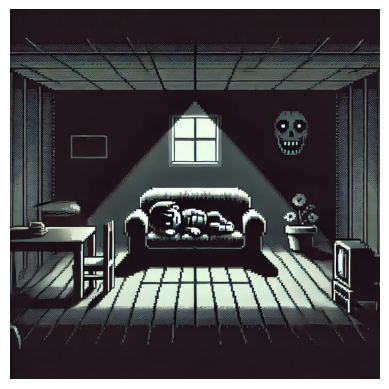

You are now in game room
What would you like to do? Type 'explore' or 'examine'?explore
You explore the room. This is game room. You find couch, piano, door a


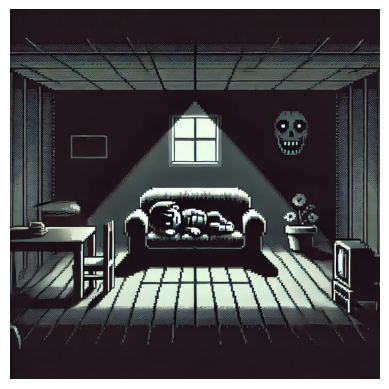

You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?piano


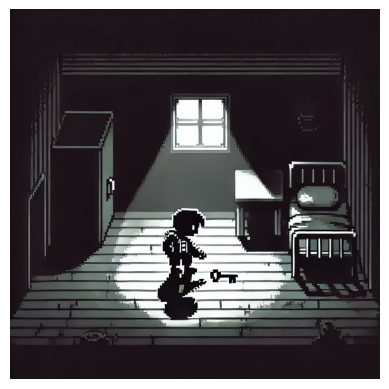

You examine piano. You find key for door a.


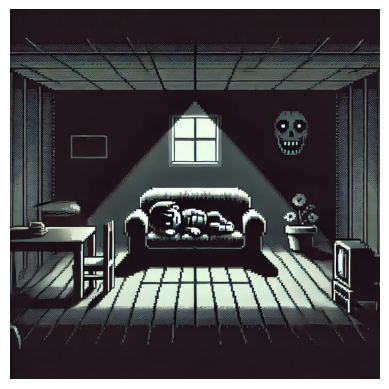

You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door a
You examine door a. You unlock it with a key you have.
Do you want to go to the next room? Ener 'yes' or 'no'yes


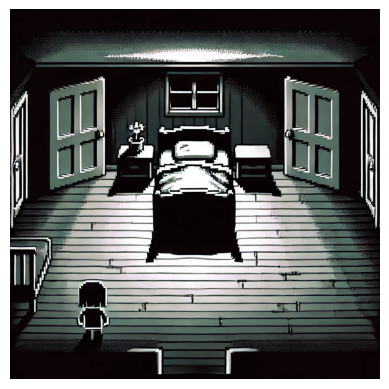

You are now in bedroom1
What would you like to do? Type 'explore' or 'examine'?explore
You explore the room. This is bedroom1. You find door a, door b, queen bed, door c


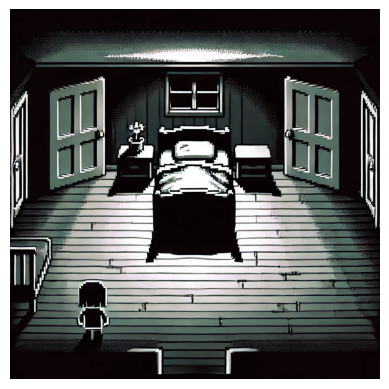

You are now in bedroom1
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?queen bed


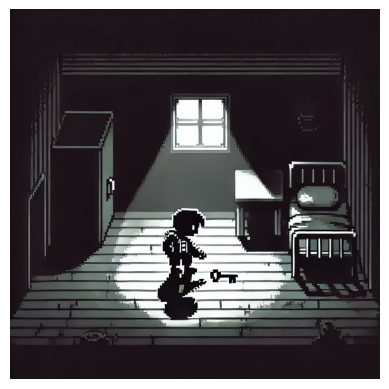

You examine queen bed. You find key for door b.


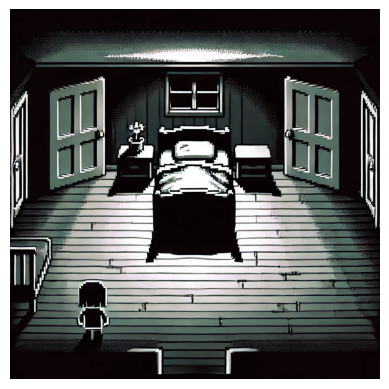

You are now in bedroom1
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door b
You examine door b. You unlock it with a key you have.
Do you want to go to the next room? Ener 'yes' or 'no'yes


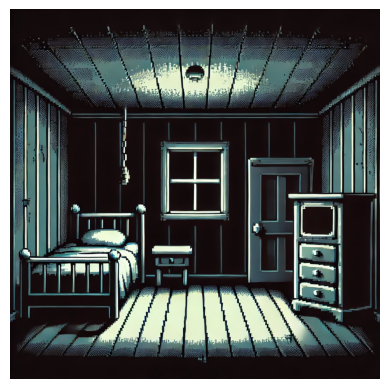

You are now in bedroom2
What would you like to do? Type 'explore' or 'examine'?explore
You explore the room. This is bedroom2. You find double bed, dresser, door b


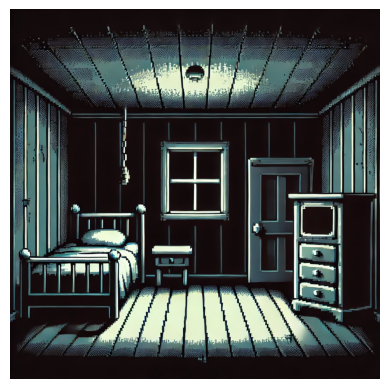

You are now in bedroom2
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?double bed


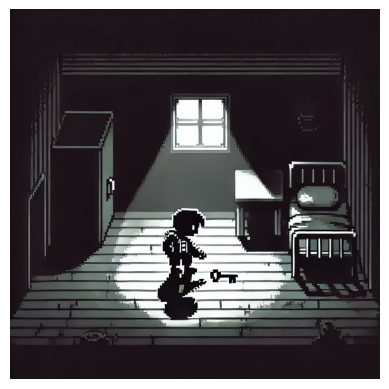

You examine double bed. You find key for door c.


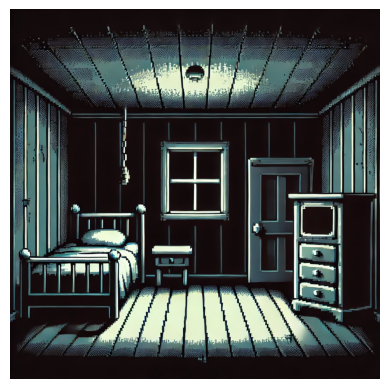

You are now in bedroom2
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?dresser


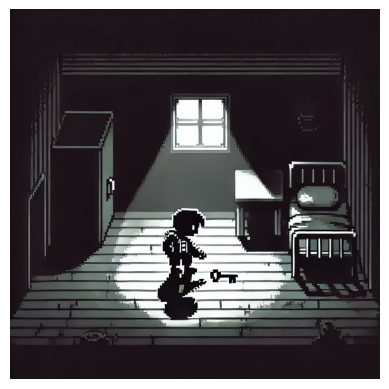

You examine dresser. You find key for door d.


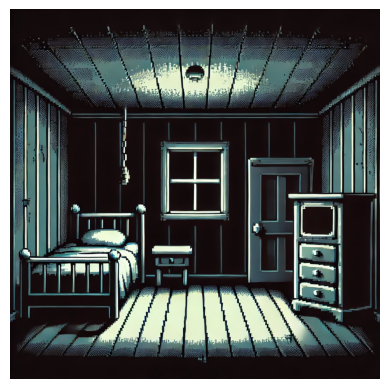

You are now in bedroom2
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door b
You examine door b. You unlock it with a key you have.
Do you want to go to the next room? Ener 'yes' or 'no'yes


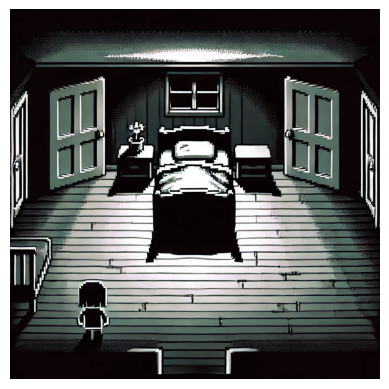

You are now in bedroom1
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door c
You examine door c. You unlock it with a key you have.
Do you want to go to the next room? Ener 'yes' or 'no'yes


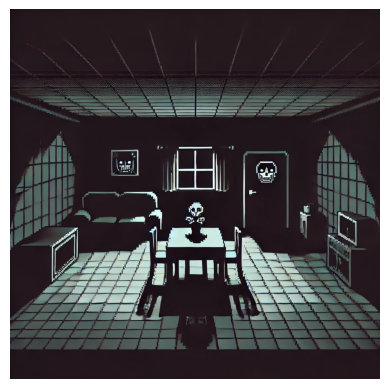

You are now in living room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door d
You examine door d. You unlock it with a key you have.
Do you want to go to the next room? Ener 'yes' or 'no'yes


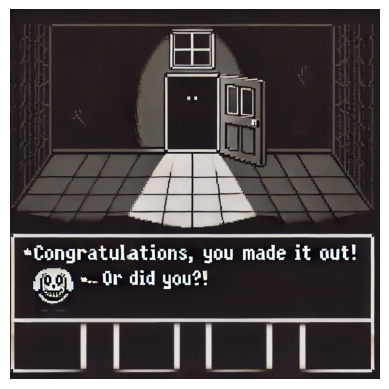

Congrats! You escaped the room!






































In [ ]:
game_state = INIT_GAME_STATE.copy()

start_game()
